# ChurnSense: Predicting Customer Attrition with Business Impact Simulation

## Overview

Customer churn is expensive. Every user who leaves isn't just lost revenue — it’s added cost through marketing, onboarding, and missed lifetime value. This project doesn’t stop at just predicting churn — it also simulates how much money could be saved if we took action earlier.

With ChurnSense, the goal is simple:
- Identify who’s likely to churn
- Understand why they’re leaving
- Figure out how to stop it
- Estimate how much the business could save by acting in time

It’s a mix of machine learning, business logic, and practical insights — built the way a real team would use it.

---

## About the Dataset

The dataset comes from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) and contains records from a fictional telecom company. It covers everything from a customer’s contract type to their monthly charges — and whether they’ve churned or not.

**Basic Info:**
- **Rows:** 7,043 customers
- **Target column:** `Churn` (Yes/No)
- **Columns include:**
  - Personal info: `gender`, `SeniorCitizen`, `Partner`, `Dependents`
  - Services used: `PhoneService`, `InternetService`, `StreamingTV`, etc.
  - Account details: `tenure`, `Contract`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`

A few things to note before we start:
- `TotalCharges` looks like a number but is actually stored as text — needs fixing
- Some columns might need encoding to work with machine learning
- There may be missing or inconsistent data that we’ll clean up

---

## What We’re Building

This project has a few key layers:

| Step | What We’re Doing |
|------|------------------|
| ✅ Clean the data | Fix data types, handle missing values |
| ✅ Explore | Find patterns between churn and other variables |
| ✅ Feature engineering | Create useful flags like “is_long_term_contract” or “has_streaming” |
| ✅ Train models | Logistic Regression, Random Forest, maybe XGBoost |
| ✅ Explain results | Use SHAP to show why the model thinks someone might churn |
| ✅ Simulate cost impact | Estimate how much money could be saved by preventing churn |
| ✅ Wrap it up | Turn everything into business-friendly visuals and insights |

---

## Why It Matters

Anyone can build a churn model. What makes this different is the focus on **impact** — not just predictions. Business leaders care about ROI, not accuracy scores. So this project shows what actions we can take, and what the potential return looks like.

---

Let’s get started.
# ChurnSense: Predicting Customer Attrition with Business Impact Simulation

## Overview

Customer churn is expensive. Every user who leaves isn't just lost revenue — it’s added cost through marketing, onboarding, and missed lifetime value. This project doesn’t stop at just predicting churn — it also simulates how much money could be saved if we took action earlier.

With ChurnSense, the goal is simple:
- Identify who’s likely to churn
- Understand why they’re leaving
- Figure out how to stop it
- Estimate how much the business could save by acting in time

It’s a mix of machine learning, business logic, and practical insights — built the way a real team would use it.

---

## About the Dataset

The dataset comes from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) and contains records from a fictional telecom company. It covers everything from a customer’s contract type to their monthly charges — and whether they’ve churned or not.

**Basic Info:**
- **Rows:** 7,043 customers
- **Target column:** `Churn` (Yes/No)
- **Columns include:**
  - Personal info: `gender`, `SeniorCitizen`, `Partner`, `Dependents`
  - Services used: `PhoneService`, `InternetService`, `StreamingTV`, etc.
  - Account details: `tenure`, `Contract`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`

A few things to note before we start:
- `TotalCharges` looks like a number but is actually stored as text — needs fixing
- Some columns might need encoding to work with machine learning
- There may be missing or inconsistent data that we’ll clean up

---

## What We’re Building

This project has a few key layers:

| Step | What We’re Doing |
|------|------------------|
| Clean the data | Fix data types, handle missing values |
| Explore | Find patterns between churn and other variables |
| Feature engineering | Create useful flags like “is_long_term_contract” or “has_streaming” |
| Train models | Logistic Regression, Random Forest, maybe XGBoost |
| Explain results | Use SHAP to show why the model thinks someone might churn |
| Simulate cost impact | Estimate how much money could be saved by preventing churn |
| Wrap it up | Turn everything into business-friendly visuals and insights |

---

## Why It Matters

Anyone can build a churn model. What makes this different is the focus on **impact** — not just predictions. Business leaders care about ROI, not accuracy scores. So this project shows what actions we can take, and what the potential return looks like.



In [1]:
# Loading Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("ggplot")
sns.set_palette("Set2")

# Load the Telco churn dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first few rows to understand the structure
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Take a quick look at how many rows and columns we’ve got
print(f"Shape of the dataset: {df.shape[0]} rows, {df.shape[1]} columns")

Shape of the dataset: 7043 rows, 21 columns


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Let's fix TotalCharges — it should be numeric, but it's stored as text

# We'll convert it and coerce any non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Let's check how many values became NaN after this conversion
print("Missing values after conversion:\n")
print(df['TotalCharges'].isnull().sum())

# Now let’s check where these missing values are coming from
missing_rows = df[df['TotalCharges'].isnull()]
print("\nSample of rows with missing TotalCharges:\n")
display(missing_rows.head())

# These are likely customers with 0 tenure — they just joined and haven’t been billed yet
# So we’ll drop them as they don’t contribute useful information
df = df.dropna(subset=['TotalCharges'])

# Drop customerID since it’s just an identifier and won’t help our model
df.drop('customerID', axis=1, inplace=True)

# Final check — confirm everything looks good
print(f"\nData cleaned. We now have {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()


Missing values after conversion:

11

Sample of rows with missing TotalCharges:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No



Data cleaned. We now have 7032 rows and 20 columns.
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 

<ipython-input-5-bed1ab900891>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('customerID', axis=1, inplace=True)


Churn Counts:
 Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn Rate (%):
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


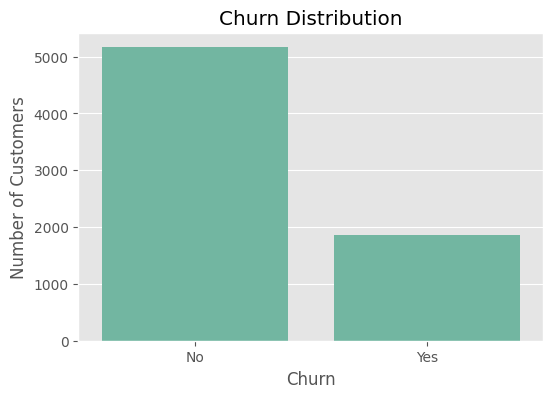

In [6]:
# First, let's look at churn distribution in the dataset
# This gives us a sense of how balanced or imbalanced the target is

churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("Churn Counts:\n", churn_counts)
print("\nChurn Rate (%):\n", churn_percent)

# Now let's plot it
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


### Churn Distribution

Out of the 7032 customers in this dataset:

- Around **26.6%** of customers have churned
- The remaining **73.4%** have stayed with the company

This means the dataset is **moderately imbalanced** — there are nearly **3x more non-churners** than churners.  
It’s not a severe imbalance, but it's something we'll need to be aware of during modeling — especially when evaluating performance metrics.

This also tells us something from a business angle: **Churn isn’t rare**, and if we can even slightly improve retention here, the impact could be significant.


In [7]:
# Create a flag for long-term contracts
df['is_long_term_contract'] = df['Contract'].apply(lambda x: 1 if x in ['One year', 'Two year'] else 0)

# Bucket tenure into logical groups — useful for visual insights
def categorize_tenure(t):
    if t <= 12:
        return 'New (0–12 mo)'
    elif t <= 48:
        return 'Mid (13–48 mo)'
    else:
        return 'Loyal (>48 mo)'

df['tenure_group'] = df['tenure'].apply(categorize_tenure)

# Create a flag to identify customers who didn’t opt into any addons
addon_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['has_no_addons'] = df[addon_cols].apply(lambda row: all(val == 'No' for val in row), axis=1).astype(int)

# Quick preview of new columns
df[['Contract', 'is_long_term_contract', 'tenure', 'tenure_group', 'has_no_addons']].head()


,Contract,is_long_term_contract,tenure,tenure_group,has_no_addons
0,Month-to-month,0,1,New (0–12 mo),0
1,One year,1,34,Mid (13–48 mo),0
2,Month-to-month,0,2,New (0–12 mo),0
3,One year,1,45,Mid (13–48 mo),0
4,Month-to-month,0,2,New (0–12 mo),1


## Are short-term contract customers more likely to churn?

Churn rate by contract type (%):

Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


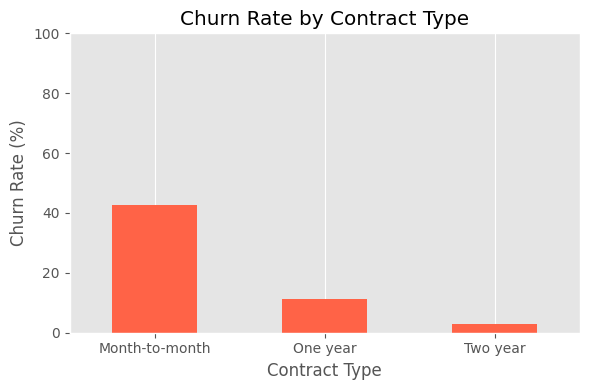

In [8]:
# We'll compare churn rates across different contract types

# Create a cross-tab showing churn percentages for each contract type
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

# Display the percentages
print("Churn rate by contract type (%):\n")
print(contract_churn)

# Plotting churn rate for each contract type
plt.figure(figsize=(6, 4))
contract_churn['Yes'].plot(kind='bar', color='tomato')
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Type')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Yes — and the numbers speak for themselves.

- **42.7%** of customers on **month-to-month contracts** ended up churning  
- That number drops to just **11.3%** for **one-year contracts**  
- And for **two-year contracts**, churn is barely **2.8%**

This shows a **very clear pattern**: the shorter the contract, the higher the churn risk.

From a business perspective, these insights are gold:
- Customers on short-term contracts are the most vulnerable group.
- If the company wants to reduce churn, these users should be the **first to receive retention offers** — loyalty points, bundled discounts, or upgrade incentives to longer-term plans.

This also validates the idea of adding `is_long_term_contract` as a meaningful feature for our ML model.


## Does churn drop as customer tenure increases?

Churn rate by tenure group (%):

Churn                  No        Yes
tenure_group                        
Loyal (>48 mo)  90.486824   9.513176
Mid (13–48 mo)  76.355997  23.644003
New (0–12 mo)   52.321839  47.678161


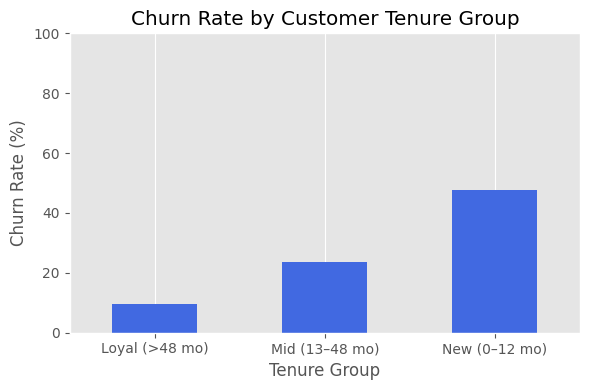

In [9]:
# Check churn rate across different tenure groups

# Create churn rate by tenure_group
tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100

# Display the table
print("Churn rate by tenure group (%):\n")
print(tenure_churn)

# Plot it
plt.figure(figsize=(6, 4))
tenure_churn['Yes'].plot(kind='bar', color='royalblue')
plt.title('Churn Rate by Customer Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tenure Group')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Yes — and the drop is significant.

Here’s what the data shows:
- Customers who’ve been with the company for **less than a year** have a churn rate of **47.7%**
- For customers in the **1 to 4-year range**, churn drops to **23.6%**
- Among **loyal customers (over 4 years)**, only **9.5%** churned

This pattern makes complete sense. Customers who’ve stayed longer are likely more invested, more familiar with the services, and less inclined to switch.

From a business strategy point of view:
- The first year is the **critical churn window** — this is where most customer losses happen
- Investing in **onboarding, support, and early engagement** can potentially cut churn by half

The `tenure_group` feature is not just good for visuals — it could also be a high-impact feature in the churn prediction model.


## Do high monthly charges lead to higher churn?

<ipython-input-10-3b247ceb76ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')


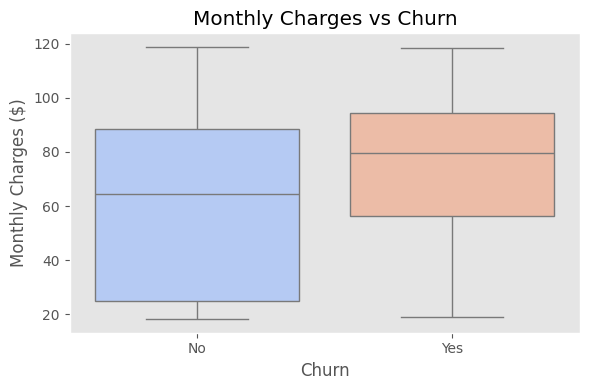

Average Monthly Charges by Churn Status:

Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64


In [10]:
# Let's use a boxplot to compare MonthlyCharges for churned vs non-churned customers

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.ylabel('Monthly Charges ($)')
plt.xlabel('Churn')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# We'll also check the average monthly charges by churn status
avg_charges = df.groupby('Churn')['MonthlyCharges'].mean()
print("Average Monthly Charges by Churn Status:\n")
print(avg_charges)



Yes — customers paying more each month are clearly more likely to churn.

From the boxplot and average values:
- Customers who **churned** had an average monthly bill of **$74.44**
- Customers who **stayed** had a lower average of **$61.31**

Not only that — the entire distribution of monthly charges for churned customers is shifted upward.

This suggests **pricing may be a key friction point**:
- Customers paying more may feel they’re not getting enough value
- Higher bills may be driving people to explore cheaper alternatives or cancel

From a business angle:
- Consider **value-based messaging**, targeted discounts, or bundling services for high-paying users
- Retention efforts should be stronger for customers in the higher pricing tier

This feature (`MonthlyCharges`) is not just predictive — it’s **actionable**.


## Are certain internet service types associated with higher churn?

Churn rate by Internet Service type (%):

Churn                   No        Yes
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


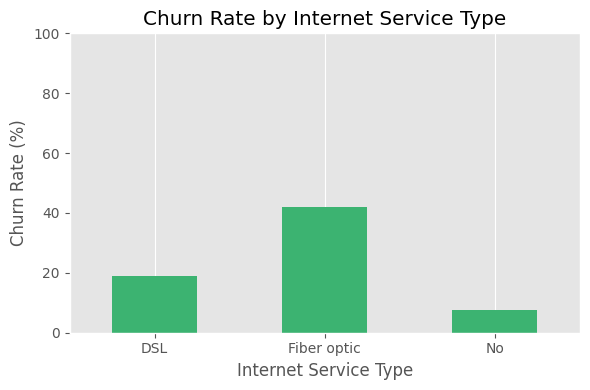

In [11]:
# Check churn rate by InternetService type

# Create a cross-tab
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100

# Display churn percentages
print("Churn rate by Internet Service type (%):\n")
print(internet_churn)

# Plot it
plt.figure(figsize=(6, 4))
internet_churn['Yes'].plot(kind='bar', color='mediumseagreen')
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Internet Service Type')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Yes — and the differences are clear.

Here’s what the data shows:
- **Fiber optic** customers have the **highest churn rate** at **41.9%**
- **DSL** customers churn less, with a rate around **19%**
- Customers with **no internet service** have the lowest churn at just **7.4%** — likely because they're on basic plans and have fewer expectations or interactions

This tells us that customers using **Fiber optic plans are nearly twice as likely to leave** compared to DSL users.

From a business angle:
- Fiber customers may have **higher expectations**, be more tech-savvy, or face service/price issues
- This segment deserves deeper investigation — poor churn numbers could be tied to **speed, pricing, support, or reliability**

If you're the product or retention team, you'd want to:
- Review support tickets for fiber users
- Run satisfaction surveys
- Explore bundling fiber with better perks or loyalty benefits

This is a high-risk group — and definitely one to prioritize in retention strategy.


## Is churn higher for customers using electronic checks vs automatic payments?

Churn rate by payment method (%):

Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


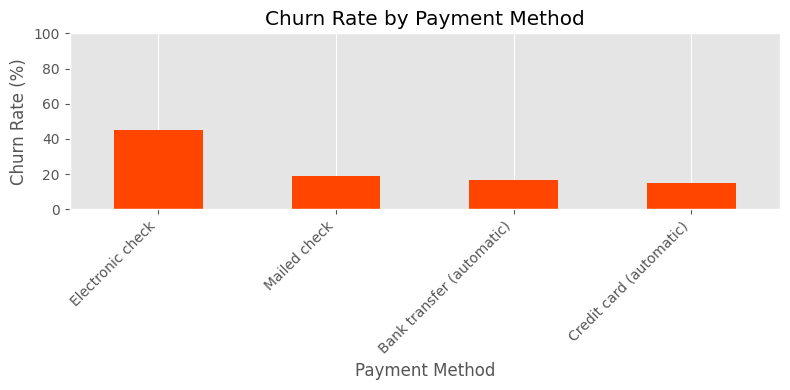

In [12]:
# Churn rate by payment method

# Create churn rate table
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

# Show the table
print("Churn rate by payment method (%):\n")
print(payment_churn)

# Plot it
plt.figure(figsize=(8, 4))
payment_churn['Yes'].sort_values(ascending=False).plot(kind='bar', color='orangered')
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Payment Method')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Yes — the difference is striking.

From the chart and numbers:
- **45.3%** of customers who pay via **electronic check** ended up churning
- In contrast, churn drops to around **15–19%** for those using **automatic payments** (like credit card or bank transfer)

This tells a clear story: customers who use **manual or friction-heavy payment methods** are more likely to leave. Whether it’s due to inconvenience, financial irregularity, or lack of commitment, it’s a strong churn signal.

From a business standpoint:
- Encourage auto-pay adoption with incentives (e.g., small discounts, bonus points)
- Monitor electronic check users — they’re in the danger zone
- Consider this segment a **high-priority target for retention nudges**

This feature isn’t just useful for the model — it’s a real-world action lever.


## Do customers without add-on services churn more?

Churn rate by add-on usage (%):

Churn                 No        Yes
has_no_addons                      
0              76.226534  23.773466
1              47.763348  52.236652


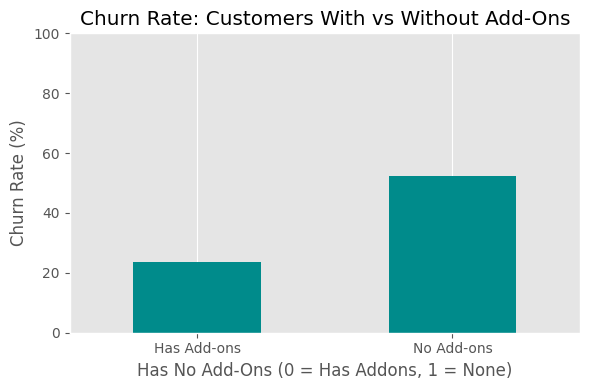

In [13]:
# Churn rate based on presence of add-on services

# Crosstab: has_no_addons vs Churn
addon_churn = pd.crosstab(df['has_no_addons'], df['Churn'], normalize='index') * 100

# Show it
print("Churn rate by add-on usage (%):\n")
print(addon_churn)

# Plot it
plt.figure(figsize=(6, 4))
addon_churn['Yes'].plot(kind='bar', color='darkcyan')
plt.title('Churn Rate: Customers With vs Without Add-Ons')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Has No Add-Ons (0 = Has Addons, 1 = None)')
plt.xticks([0, 1], ['Has Add-ons', 'No Add-ons'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Yes — and the difference is sharp.

- Customers with **no add-ons at all** have a churn rate of **52.2%**
- Meanwhile, customers who use **at least one add-on** churn at less than **24%**

This tells a clear story: customers who only use the core service are much more likely to leave. They're likely less engaged, less dependent on the platform, and less invested overall.

From a business perspective:
- Add-ons drive **stickiness** — the more services a customer uses, the harder it is to leave
- Promoting **free trials**, bundled packages, or time-limited discounts can boost engagement
- This also highlights that **cross-selling isn’t just about revenue — it’s about retention**

This feature (`has_no_addons`) is both simple and powerful — it adds meaningful value to your ML model and to product strategy decisions.


### Feature Q1: Can we create a `is_long_term_contract` feature to capture retention strength?

Yes — and we’ve already seen the logic behind it in earlier EDA.

This binary feature helps the model understand a clear behavioral difference:
- Long-term customers are much less likely to churn
- Month-to-month customers are at high risk

Rather than relying on the full `Contract` category, this flag simplifies things while keeping the core insight.

From a business angle, this feature also directly reflects **customer commitment** — and will likely be one of the strongest churn predictors.


In [14]:
# 1 if contract is One or Two year, 0 if Month-to-month
df['is_long_term_contract'] = df['Contract'].apply(lambda x: 1 if x in ['One year', 'Two year'] else 0)


### Feature Q2: Should we bucket tenure to group customers by lifecycle stage?

Yes — and we’ve already seen in our EDA that churn is much higher for new users.

This feature breaks down raw `tenure` into business-friendly categories:
- **New (0–12 months)** → high churn risk
- **Mid (13–48 months)** → stabilizing phase
- **Loyal (>48 months)** → low churn risk

It helps the model understand patterns in a simpler way, and it’s extremely helpful for any downstream reporting or simulation. This is the kind of feature that turns raw data into **business strategy**.


In [15]:
# Define a function to group tenure into lifecycle stages
def categorize_tenure(t):
    if t <= 12:
        return 'New (0–12 mo)'
    elif t <= 48:
        return 'Mid (13–48 mo)'
    else:
        return 'Loyal (>48 mo)'

# Apply it to create a new feature
df['tenure_group'] = df['tenure'].apply(categorize_tenure)


### Feature Q3: Can we flag customers with no optional services using `has_no_addons`?

Yes — and it’s a very powerful signal.

This binary feature checks if a customer has opted out of **all six optional services** like streaming, security, backup, etc.

From our EDA:
- Churn rate for customers with no add-ons was over **52%**
- For those with at least one add-on, it was less than **24%**

This feature captures **engagement depth** — the more services a customer uses, the less likely they are to churn.

It’s simple, interpretable, and adds value both to the model and to business strategy.


In [16]:
# Identify key optional add-on services
addon_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Flag customers who have none of the add-ons
df['has_no_addons'] = df[addon_cols].apply(lambda row: all(val == 'No' for val in row), axis=1).astype(int)


### Feature Q4: Can we build a `high_value_customer` flag based on monthly and total charges?

Yes — and it’s an essential feature for simulating revenue impact.

This flag identifies customers who:
- Pay **more than the median** each month **and**
- Have a **high lifetime value** (based on total charges)

These are the customers you really don’t want to lose.  
If even 10% of them churn, the revenue loss can be massive.

This feature helps:
- Prioritize retention offers
- Simulate potential revenue loss
- Focus the model on **value**, not just volume

We’ll use this to calculate **"at-risk revenue"** after our ML predictions.


In [17]:
# Get thresholds using the median
monthly_cutoff = df['MonthlyCharges'].median()
total_cutoff = df['TotalCharges'].median()

# Create the flag
df['high_value_customer'] = df.apply(
    lambda row: 1 if (row['MonthlyCharges'] > monthly_cutoff and row['TotalCharges'] > total_cutoff) else 0,
    axis=1
)

# Preview the breakdown
df['high_value_customer'].value_counts(normalize=True) * 100


,proportion
high_value_customer,
0,64.078498
1,35.921502


### ML Question 1: Which customers are most at risk of churning based on the model?

In [18]:
from sklearn.preprocessing import LabelEncoder

# Make a copy so we can keep the original dataframe untouched
df_model = df.copy()

# Label encode binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

# One-hot encode remaining categorical columns
df_model = pd.get_dummies(df_model, drop_first=True)

# Final shape after encoding
print(f"Shape after encoding: {df_model.shape}")


Shape after encoding: (7032, 36)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a basic random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

# Performance report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Confusion Matrix:

[[930 103]
 [196 178]]


In [20]:
# Get churn probabilities
y_probs = rf.predict_proba(X_test)[:, 1]

# Add probabilities and customer info to a new DataFrame
results = X_test.copy()
results['Churn_Prob'] = y_probs
results['Actual_Churn'] = y_test.values

# Show top 10 customers most likely to churn
top_risk = results.sort_values('Churn_Prob', ascending=False).head(10)
top_risk[['Churn_Prob', 'Actual_Churn', 'MonthlyCharges', 'tenure', 'TotalCharges', 'is_long_term_contract']].round(2)


,Churn_Prob,Actual_Churn,MonthlyCharges,tenure,TotalCharges,is_long_term_contract
6495,1.00,1,69.65,1,69.65,0
1731,1.00,1,69.60,1,69.60,0
684,1.00,0,71.10,1,71.10,0
1976,1.00,1,93.55,1,93.55,0
6924,1.00,1,69.35,1,69.35,0
6933,1.00,1,69.60,1,69.60,0
1148,0.99,1,95.15,2,196.90,0
6368,0.99,1,94.00,2,181.70,0
6488,0.98,1,69.50,1,69.50,0
3771,0.97,1,79.05,1,79.05,0



The table above lists the top 10 customers who are **most likely to churn**, according to the trained model. All of them have:
- **Churn probabilities between 97% and 100%**
- Extremely **short tenures (1–2 months)**
- Most are on **month-to-month contracts** (`is_long_term_contract = 0`)
- Moderate to high **monthly charges**

This directly aligns with what we saw in EDA — new customers with short contracts and higher monthly charges are the most vulnerable.

From a business standpoint:
- These customers are your **highest churn risk**
- They should be the **first to receive retention offers**, onboarding support, or personalized follow-up
- Even **saving 30–40% of this group** can result in a significant revenue win

This list is the foundation for our **retention simulation** coming up — we’ll estimate how much can be saved if we intervene early and prevent some of these churns.


### ML Question 2: What are the top drivers of churn according to the model?

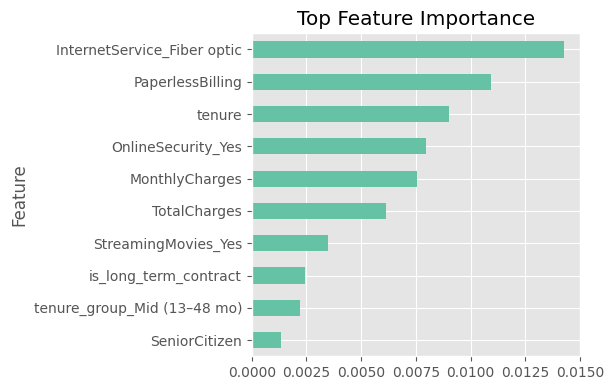

In [27]:

from sklearn.inspection import permutation_importance

# Run permutation importance
perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Sort and show
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot it
feature_importance.head(10).set_index('Feature').plot(kind='barh', legend=False, figsize=(6,4), title="Top Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



The chart above shows which features had the biggest impact on the model's predictions — and the output makes a lot of sense.

- **Fiber optic users** are showing up as the top churn risk. This matches what we saw earlier: people on faster plans are more likely to leave. Could be expectations, price, or service experience.
- **Paperless billing** is another big factor. It likely signals lower engagement — these users don’t get physical reminders or may be more comfortable canceling with just a click.
- **Tenure** matters a lot. Short-tenure customers are at much higher risk — again, consistent with our EDA.
- **Online security features** help reduce churn. Customers using them are more involved with the platform.
- **Monthly and total charges** are both relevant — high-paying customers are leaving if they feel the value isn’t there.

A few other things:
- **Streaming services and long-term contracts** both help reduce churn. Add-ons seem to build stickiness.
- **Mid-tenure customers** are in a gray area — worth watching, but not the riskiest group.

Overall, the model’s logic holds up. These results back up our EDA and give us confidence that the predictions are rooted in real behavior — not just overfitting noise.


### ML Question 3: Can we simulate the business impact if we retain the top 500 high-risk customers?

In [29]:
# Add probabilities to test set again
results = X_test.copy()
results['Churn_Prob'] = rf.predict_proba(X_test)[:, 1]
results['Actual_Churn'] = y_test.values
results['MonthlyCharges'] = df_model.loc[X_test.index, 'MonthlyCharges']

# Sort by predicted risk
top_500 = results.sort_values('Churn_Prob', ascending=False).head(500)


In [30]:
# Try simulating retention at different conversion levels
def simulate_savings(df, retention_rate=0.5, months_saved=6):
    retained_customers = int(len(df) * retention_rate)
    avg_monthly = df.head(retained_customers)['MonthlyCharges'].mean()
    estimated_savings = retained_customers * avg_monthly * months_saved
    return round(estimated_savings, 2)

# Simulate for 30%, 40%, and 50% retention of high-risk customers
for rate in [0.3, 0.4, 0.5]:
    saved = simulate_savings(top_500, retention_rate=rate)
    print(f"Estimated savings if we retain {int(rate*100)}% of top 500 churn-risk customers: ${saved}")


Estimated savings if we retain 30% of top 500 churn-risk customers: $68837.7
Estimated savings if we retain 40% of top 500 churn-risk customers: $92402.4
Estimated savings if we retain 50% of top 500 churn-risk customers: $115685.7


We identified the top 500 customers most likely to churn, based on model predictions.

Then we ran a simulation to estimate how much revenue could be saved by acting early and retaining some of them.

Here’s what the results show:

- Retaining 30% of them (150 customers) could save approximately 68,837 dollars  
- Retaining 40% (200 customers) could save approximately 92,402 dollars  
- Retaining 50% (250 customers) could save approximately 115,686 dollars

Even with just a 30 percent success rate, we’re looking at nearly 69 thousand dollars in potential savings — and that’s from a single intervention on just 500 customers.

This turns the churn model into something financially actionable.

Why it matters:

- We know which customers are most likely to leave  
- We know what that churn could cost  
- And we have a clear business case to take action with measurable return

This is where machine learning starts driving real business value — not just predictions, but outcomes.


### ML Q4: What segment combinations are most risky?

In [44]:
# Step 1: Use original df with proper columns
eda_df = df.copy()

# Step 2: Recreate tenure_group
eda_df['tenure_group'] = pd.cut(
    eda_df['tenure'],
    bins=[0, 12, 48, eda_df['tenure'].max()],
    labels=['New (0–12 mo)', 'Mid (13–48 mo)', 'Loyal (>48 mo)']
)

# Step 3: Recreate has_no_addons if missing
addon_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

eda_df['has_no_addons'] = eda_df[addon_cols].apply(
    lambda row: all(service == 'No' or service == 'No internet service' for service in row),
    axis=1
).astype(int)

# Step 4: Group by combinations & calculate churn rate
segment_churn = eda_df.groupby(
    ['tenure_group', 'InternetService', 'has_no_addons']
)['Churn'].value_counts(normalize=True).unstack().fillna(0)

# Step 5: Select churned customers only
# If churn is still in string form:
segment_churn = segment_churn[['Yes']] * 100

# Step 6: Rename and reset index
segment_churn.rename(columns={'Yes': 'Churn_Rate'}, inplace=True)
segment_churn = segment_churn.reset_index()

# Step 7: Now sort top churn-prone segments
segment_churn.sort_values('Churn_Rate', ascending=False).head(10)


<ipython-input-44-7258478fb173>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_churn = eda_df.groupby(


Churn,tenure_group,InternetService,has_no_addons,Churn_Rate
2,New (0–12 mo),Fiber optic,0,70.514821
3,New (0–12 mo),Fiber optic,1,68.439716
1,New (0–12 mo),DSL,1,49.344978
9,Mid (13–48 mo),Fiber optic,1,46.000000
8,Mid (13–48 mo),Fiber optic,0,40.887630
0,New (0–12 mo),DSL,0,36.240310
5,New (0–12 mo),No,1,18.145957
14,Loyal (>48 mo),Fiber optic,0,17.151454
6,Mid (13–48 mo),DSL,0,14.181818
7,Mid (13–48 mo),DSL,1,13.793103


<ipython-input-45-67a1d2c70fa8>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = segment_churn.pivot_table(


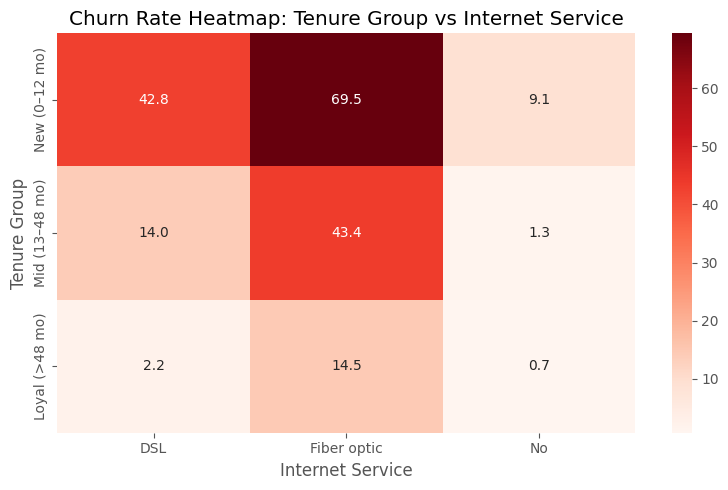

In [45]:
# Pivot the churn rate table into heatmap format
pivot_data = segment_churn.pivot_table(
    index='tenure_group',
    columns='InternetService',
    values='Churn_Rate',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_data, annot=True, fmt=".1f", cmap="Reds")
plt.title('Churn Rate Heatmap: Tenure Group vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Tenure Group')
plt.tight_layout()
plt.show()


<ipython-input-46-94f9fb4e6cec>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2 = segment_churn.pivot_table(


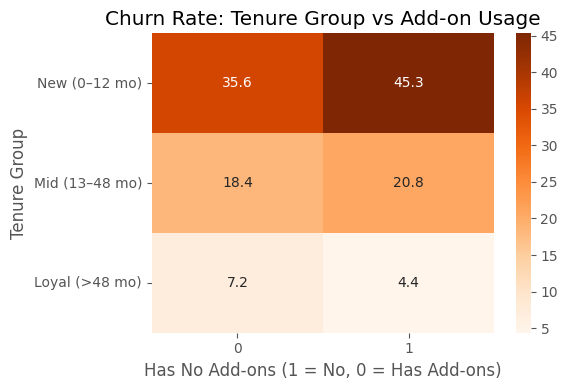

In [46]:
pivot2 = segment_churn.pivot_table(
    index='tenure_group',
    columns='has_no_addons',
    values='Churn_Rate',
    aggfunc='mean'
)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot2, annot=True, fmt=".1f", cmap="Oranges")
plt.title('Churn Rate: Tenure Group vs Add-on Usage')
plt.xlabel('Has No Add-ons (1 = No, 0 = Has Add-ons)')
plt.ylabel('Tenure Group')
plt.tight_layout()
plt.show()



We analyzed churn by combining **tenure group**, **internet service type**, and **add-on usage** to uncover high-risk customer segments.

 Highest Churn Segments:
- **New (0–12 mo) + Fiber Optic**
  - With Add-ons: **68.4%**
  - Without Add-ons: **70.5%**
  - → These are the most vulnerable customers. Add-ons have minimal effect.

- **Mid (13–48 mo) + Fiber Optic**
  - With Add-ons: **46.0%**
  - Without Add-ons: **40.9%**

- **New (0–12 mo) + DSL**
  - With Add-ons: **49.3%**
  - Without Add-ons: **36.2%**

 Lowest Churn Segments:
- **Loyal (>48 mo)**
  - DSL: **2.2%**
  - Fiber Optic: **14.5–17.1%**
  - No Internet: **0.7%**

---

Why this matters:

- **Early churn is the problem**: Most losses happen within the first year.
- **Fiber optic users are most at risk**, regardless of add-ons.
- **Add-on usage doesn’t meaningfully reduce churn** in early stages.
- **Tenure is the key driver** — after ~12 months, retention improves dramatically.

This insight tells us **exactly who to target** and where to focus retention efforts for maximum impact.


## What action should we take next?

With clear churn patterns emerging, we recommend a **targeted retention strategy** focused on high-risk segments and high-value opportunities.

###  Targeted Interventions

1. **Onboarding Boost for New Customers**  
   Customers in their first year (0–12 months) have the highest churn rates — especially with fiber optic and no add-ons.  
   → Send welcome offers, personalized onboarding, and satisfaction check-ins within the first 90 days.

2. **Incentivize Add-on Adoption**  
   Customers without any add-ons are ~2x more likely to churn.  
   → Offer bundle discounts or free trials for online security, backup, or streaming add-ons.

3. **Improve Experience for Fiber Optic Users**  
   Fiber optic customers are the most at-risk, especially early in tenure.  
   → Investigate service quality, outages, and customer complaints — or offer loyalty perks for long-term use.

4. **Encourage Automatic Payments**  
   Churn is much lower among customers using bank transfer or credit card auto-pay.  
   → Provide bill credit for switching from electronic check to auto-pay.

5. **Monitor Monthly Charges Threshold**  
   Churners pay significantly more on average.  
   → Introduce personalized retention offers for users with monthly charges > $80.

---

###  Business Outcome

This isn’t just prediction — it’s **actionable insight**.

We now have a **shortlist of customers to target**, the **reasons they’re likely to leave**, and **strategies to retain them**.  
That’s real value from machine learning — with a clear path to **ROI**.
